📊 Model Performance (Random Forest):
✅ Accuracy: 0.6222
✅ Precision: 0.2770
✅ Recall: 0.2425
✅ F1 Score: 0.2586
✅ ROC-AUC Score: 0.5032

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75     14566
           1       0.28      0.24      0.26      5434

    accuracy                           0.62     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.61      0.62      0.61     20000



C:\Users\pullu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


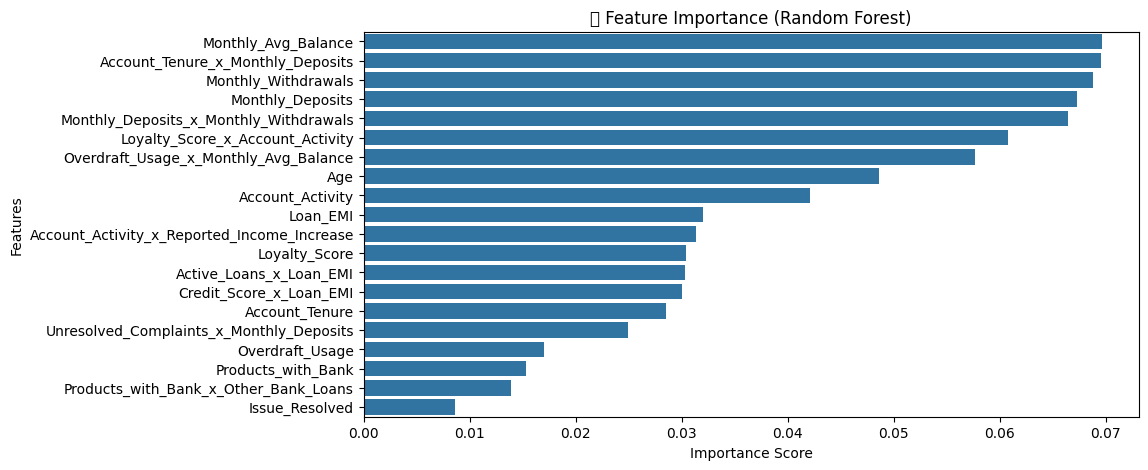

In [1]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# 📌 Step 2: Load Dataset with Feature Interactions
df = pd.read_csv("../data/features.csv")  # Updated features dataset with interactions
y = pd.read_csv("../data/hidden_churn_labels.csv")["Churn"]  # Load hidden churn labels

# 📌 Step 3: Identify Categorical & Numerical Features
categorical_features = ['Gender', 'Income_Group', 'Customer_Type', 'Residency_Status', 'Account_Type', 'Credit_Score']
numerical_features = [col for col in df.columns if col not in categorical_features and col != "Customer_ID"]

# 📌 Step 4: Data Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 📌 Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Customer_ID"]), y, test_size=0.2, random_state=42, stratify=y)

# 📌 Step 6: Train Random Forest Model
rf_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight="balanced", random_state=42))
])

rf_model.fit(X_train, y_train)

# 📌 Step 7: Predict & Evaluate
y_pred = rf_model.predict(X_test)

# 📌 Step 8: Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"📊 Model Performance (Random Forest):")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# 📌 Step 9: Feature Importance Plot
feature_importances = rf_model.named_steps["classifier"].feature_importances_
feature_names = numerical_features + list(rf_model.named_steps["preprocessing"].transformers_[1][1].get_feature_names_out(categorical_features))

# Convert to DataFrame
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(20)

# 📊 Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature")
plt.title("📉 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


📊 Model Performance (Random Forest):
✅ Accuracy: 0.6222
✅ Precision: 0.2770
✅ Recall: 0.2425
✅ F1 Score: 0.2586
✅ ROC-AUC Score: 0.5032

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75     14566
           1       0.28      0.24      0.26      5434

    accuracy                           0.62     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.61      0.62      0.61     20000



C:\Users\pullu\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


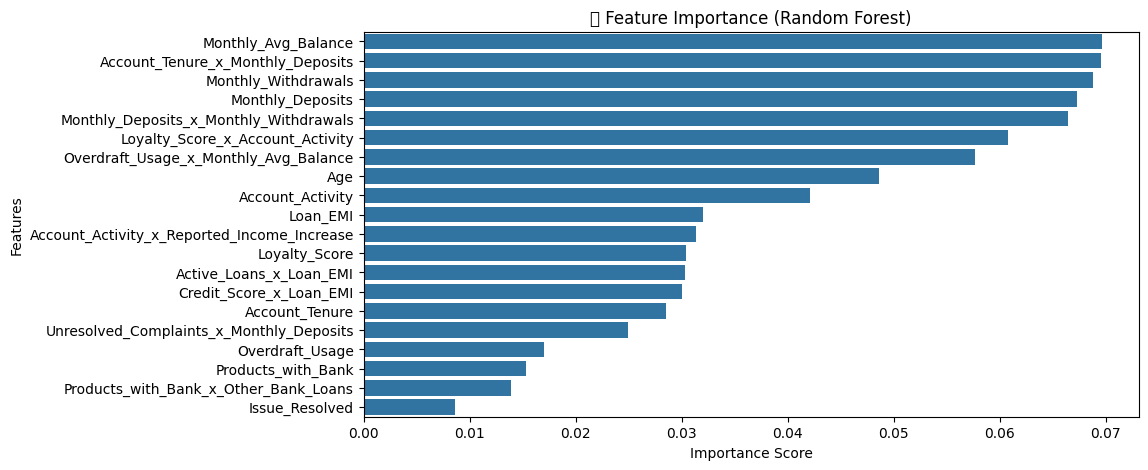

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 1200x600 with 0 Axes>

In [4]:
# 📌 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# 📌 Step 2: Load Dataset with Feature Interactions
df = pd.read_csv("../data/features_with_interactions.csv")  # Updated features dataset with interactions
y = pd.read_csv("../data/hidden_churn_labels.csv")["Churn"]  # Load hidden churn labels

# 📌 Step 3: Identify Categorical & Numerical Features
categorical_features = ['Gender', 'Income_Group', 'Customer_Type', 'Residency_Status', 'Account_Type', 'Credit_Score']
numerical_features = [col for col in df.columns if col not in categorical_features and col != "Customer_ID"]

# 📌 Step 4: Data Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 📌 Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Customer_ID"]), y, test_size=0.2, random_state=42, stratify=y)

# 📌 Step 6: Train Random Forest Model
rf_model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight="balanced", random_state=42))
])

rf_model.fit(X_train, y_train)

# 📌 Step 7: Predict & Evaluate
y_pred = rf_model.predict(X_test)

# 📌 Step 8: Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"📊 Model Performance (Random Forest):")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# 📌 Step 9: Feature Importance Plot
feature_importances = rf_model.named_steps["classifier"].feature_importances_
feature_names = numerical_features + list(rf_model.named_steps["preprocessing"].transformers_[1][1].get_feature_names_out(categorical_features))

# Convert to DataFrame
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False).head(20)

# 📊 Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature")
plt.title("📉 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 📌 Step 10: SHAP Values Calculation - Proper Handling for Pipelines
import shap

# Extract the trained RandomForest model from the pipeline
rf_trained_model = rf_model.named_steps['classifier']

# Transform the test data using the preprocessing pipeline
X_test_transformed = rf_model.named_steps['preprocessing'].transform(X_test)

# Extract the correct feature names after one-hot encoding
onehot_encoded_features = rf_model.named_steps['preprocessing'].transformers_[1][1].get_feature_names_out(categorical_features)
full_feature_names = numerical_features + list(onehot_encoded_features)

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_trained_model)
shap_values = explainer.shap_values(X_test_transformed)

# 📌 Step 11: SHAP Summary Plot
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values[1], X_test_transformed, feature_names=full_feature_names)  # [1] for class 1 (churn)



In [ ]:
---------------------------------------------------------------------------
AssertionError                            Traceback (most recent call last)
Cell In[4], line 94
     92 # 📌 Step 11: SHAP Summary Plot
     93 plt.figure(figsize=(12, 6))
---> 94 shap.summary_plot(shap_values[1], X_test_transformed, feature_names=full_feature_names)  # [1] for class 1 (churn)

File ~\AppData\Local\Programs\Python\Python311\Lib\site-packages\shap\plots\_beeswarm.py:659, in summary_legacy(shap_values, features, feature_names, max_display, plot_type, color, axis_color, title, alpha, show, sort, color_bar, plot_size, layered_violin_max_num_bins, class_names, class_inds, color_bar_label, cmap, show_values_in_legend, use_log_scale, rng)
    654         raise ValueError(
    655             shape_msg + " Perhaps the extra column in the shap_values matrix is the "
    656             "constant offset? Of so just pass shap_values[:,:-1]."
    657         )
    658     else:
--> 659         assert num_features == features.shape[1], shape_msg
    661 if feature_names is None:
    662     feature_names = np.array([labels["FEATURE"] % str(i) for i in range(num_features)])

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.
<Figure size 1200x600 with 0 Axes>

okay inderstand your above description, but in the random forest notebook we are still facing 